In [1]:
from random import choices
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
%matplotlib inline
import sympy
from scipy.optimize import minimize
import numpy
import math
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
# Import function to create training and test set splits
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline
import pylab
from sklearn.metrics import mean_squared_error

In [ ]:
#variance_depth=
r_asumb=0
q=[]
lrn_r_depth=30
#nmbr_pnts=
#rndmnss=
nmbr_data_points=2000
lrning_depth=5
h_lim=0.01
intial_est=20
data_randomness=5
min_step=-2
lrn_r_depth=10
predicted_randomness=9
euler_est=2
r_asum=0
qsum=0
pylab.ylim([0,2])
pylab.xlim([0,2])
df_crp=pd.read_csv("C:/Users/dylan/Downloads/Production_Crops_E_Africa.csv",encoding = "ISO-8859-1")
#df_crp=df_crp.drop(['Item Code'], axis=1)
df_crp=df_crp.drop(['Unit'], axis=1)
df_crp=df_crp.drop(['Element Code'], axis=1)
df_crp=df_crp.drop(['Area'], axis=1)
df_crp=df_crp.drop(['Area Code'], axis=1)
df_crp=df_crp.drop(['Item Code'], axis=1)
dr_crp=df_crp.transpose()
df_crp=df_crp[df_crp['Element'].str.contains("Yield")]
#df_crp=df_crp[df_crp['Element'].str.contains("Production")]
df_crp=df_crp[df_crp['Item'].str.contains("Cereals,Total")]
df_crp=df_crp.drop(['Element'], axis=1)
df_crp=df_crp.drop(['Item'], axis=1)
for i in range (0,54):
    df_crp = df_crp.drop([df_crp.columns[i+1]],  axis='columns')

df_crp = pd.DataFrame(np.repeat(df_crp.values,2,axis=0))
df_crp.columns = df_crp.columns
df_crp = df_crp.reindex(df_crp.columns.tolist() + ['last'], axis=1)  # version > 0.20.0
df_crp=df_crp.transpose()


#df_crp=df_crp.drop(['Element'], axis=1)
#cols = list(df_crp.columns)
#cols = [cols[-1]] + cols[:-1]
#df_crp= df_crp[cols]
dfx_crp=pd.DataFrame()
dfy_crp=pd.DataFrame()
X=[]
y=[]
for i in range(0,56):
    df_crp[i*2]=df_crp[i*2].shift(periods=1)
for i in range(0,56):
    dfx_crp[i]=df_crp[i*2]
    dfy_crp[i]=df_crp[i*2+1]
for k in range(0,56):
    X.append(dfx_crp[k])
combinedx = pd.concat(X, ignore_index=True)
y_testB=[]
inputs_test=[]
for k in range(0,56):
    y.append(dfy_crp[k])
combinedy = pd.concat(y, ignore_index=True)
#dfx_crp=dfx_crp.stack(dropna=False)
#dfy_crp=dfy_crp.stack(dropna=False)
df_concat = pd.concat([combinedy, combinedx], axis=1)
df_concat=df_concat.dropna(inplace=False)

ytst=df_concat[df_concat.columns[1]].tail(2000)
inputsi=df_concat[df_concat.columns[0]].tail(2000)



inputs_test=ytst.tail(2000)
y_testB=inputsi.tail(2000)
inputs=df_concat[df_concat.columns[0]].head(2000)
y=df_concat[df_concat.columns[1]].head(2000)

y_testB=y_testB.values
y=y.values
inputs=inputs.values
inputs_test=inputs_test.values
print("x_test:",len(inputs_test),"y_test:","x:",len(inputs),"y:", len(y))
yd=[]
for i in range(0,len(y)):
    yd.append(y[i]/inputs[i])
xd=[]
x_AV=(sum(inputs)/len(inputs))
for i in range(0,len(y)):
    xd.append(inputs[i]/x_AV)
inputs=xd
y=yd




ydt=[]
for i in range(0,len(y_testB)):
    ydt.append(y_testB[i]/inputs_test[i])
xdt=[]
x_AVt=(sum(inputs_test)/len(inputs_test))
for i in range(0,len(y_testB)):
    xdt.append(inputs_test[i]/x_AVt)
inputs_test=xdt
y_testB=ydt



#inputs=np.random.randint(-1000, 1000, size=nmbr_data_points)/100
#y=inputs**2
b1=y
#plt.scatter(inputs, y)
#a=data_randomness
#r1=(1+a)*1000
#r2=(1-a)*1000
#r=np.random.randint(r2, r1, size=nmbr_data_points)/1000
#y=y*r
#b1=y
x_values=np.random.randint(0.03, 8, size=nmbr_data_points)/10
t_min=[]
e=10
t=[]
y_avg=sum(y)/len(y)
y_var=(sum(abs(y_avg-y)))/len(y)
yovar=y_var
for q in range(0,lrn_r_depth): 
    

    y_var=(yovar/(predicted_randomness))*0.3
#    print("y_var:",y_var)

    def rosen(x):
        if x<1:
            x=1

        t=[]
        t_min=[]
        for i in inputs:
            y_xa=sum(y*(1/(x**(abs(i-inputs))))/sum(1/(x**(abs(i-inputs)))))
            t.append(y_xa)
        for i in x_values:
            y_xb=sum(y*(1/(x**(abs(i-inputs))))/sum(1/(x**(abs(i-inputs)))))
            t_min.append(y_xb)

        t_avg=sum(t)/len(t)
        t_var=(sum(abs(t_avg-t)))/len(t)
        return(abs(t_var-y_var))
        print(t_var-y_var)
#        return(abs(t_var-y_var),((((sum(abs(t_min-y)))/len(t_min))),t_var,t_var-y_var))
    #

    
    ####minimizer
    x0 = np.array([2.0])
    #    
    #res = minimize(rosen, x0, method='nelder-mead',
    #            options={"maxiter":500, "maxfev":500})
    res = minimize(rosen, x0, method='nelder-mead',
            options={"maxiter":500, "maxfev":500})
    intial_est=res.x
#    for i in range(0,lrning_depth):
#        der1=((rosen(intial_est+h_lim)))[0]
#        der2=(rosen(intial_est))[0]
#        intial_est=intial_est+(((((rosen(intial_est+h_lim)[0]-rosen(intial_est)[0])))/h_lim))*((((min_step))))
    if intial_est<-2:
        intial_est=(np.random.randint(-200, 200)/10000)
        print("no")
    print("intial_est:",intial_est)
    
    #    print(rosen(intial_est),intial_est)

    #    if intial_est<1:
    #        intial_est=1.1
    #        print("no")

    #    print(rosen(intial_est),y_var)
    #    print(intial_est)
    e=abs(intial_est)
    r_est=[]
    for i in inputs:
        y_e=sum(y*(1/(e**(abs(i-inputs))))/sum(1/(e**(abs(i-inputs)))))
    y_avgb=(sum(numpy.absolute(y)))/len(y)
    r_a=(sum(abs(y/y_e-1)))/len(y)
    r_est=(y_avgb/r_a)
    

    
    e=abs(intial_est)


    r_asumb=r_asumb+r_a
    #rosen1=var_rose
    
    
    r_asum=r_a+r_asum
    qsum=1+qsum
    r_a=(r_asum/qsum)*0.6+r_a*0.4
    predicted_randomness=r_a+1
    print("predicted randomnessw:",r_a)
    
randomness_estimate=r_asum/qsum
tg=[]
print(randomness_estimate,"actual")
x2_values=np.linspace(start = 0.03, stop = 2.5, num =10000)
for i in x2_values:
    y_x=sum(y*(1/(e**(abs(i-inputs))))/sum(1/(e**(abs(i-inputs)))))
    tg.append(y_x)


plt.scatter(inputs_test,y_testB)
plt.scatter(x2_values,tg)
plt.show()
ar=rosen(e)
print(ar)
#print(r_est)
target_column =pd.DataFrame(y)
input2=inputs
predictors = list(set(list(inputs))-set(target_column))
y=numpy.array(y).reshape(-1,1)
X =numpy.array(inputs).reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min =2
degree_max =8
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)
print(list(model.predict([[i]])))
z=[]
for i in x2_values:
    z.append(list(model.predict([[i]])))


#plt.plot(x2_values,(x2_values)**2)
print(input)
pylab.ylim([0,2])
pylab.xlim([0,2])
plt.scatter(inputs_test,y_testB)
plt.scatter(x2_values,z)
plt.show()
lasso_pred=[]
Xaxis_pred=[]
e=abs(intial_est)

#y_testB=y_testB.tolist()
#inputs_test=inputs_test.tolist()
for i in range(0,len(y_testB)):
    lasso_pred.append(list(model.predict([[inputs_test[i]]])))
    a=sum(b1*(1/(e**(abs(inputs_test[i]-input2)))))
    b=sum(1/(e**(abs(inputs_test[i]-input2))))
    Xaxis_pred.append(a/b)
#print((((y*(1/(e**(abs(inputs_test[1]))))))))

#print(b)
print(a)

resultX=0
resultL=0
print(Xaxis_pred[1])
for i in range(0,len(y_testB)):
    resultX=resultX+abs(Xaxis_pred[i]/y_testB[i]-1)
    resultL=resultL+abs(lasso_pred[i]/y_testB[i]-1)

L_accuracy=resultL/len(y_testB)
X_accuracy=resultX/len(y_testB)
print("Lasso Accuracy=",L_accuracy)
print("X-axis Accuracy=",X_accuracy)
print("X-axis Accuracy=",X_accuracy)


x_test: 2000 y_test: x: 2000 y: 2000
intial_est: [1.48808594]
predicted randomnessw: 0.13609811057384386


In [5]:
df_crp=pd.read_csv("C:/Users/dylan/Downloads/Production_Crops_E_Africa.csv",encoding = "ISO-8859-1")
#df_crp=df_crp.drop(['Item Code'], axis=1)
df_crp=df_crp.drop(['Unit'], axis=1)
df_crp=df_crp.drop(['Element Code'], axis=1)
df_crp=df_crp.drop(['Area'], axis=1)
df_crp=df_crp.drop(['Area Code'], axis=1)
df_crp=df_crp.drop(['Item Code'], axis=1)
dr_crp=df_crp.transpose()
df_crp=df_crp[df_crp['Element'].str.contains("Yield")]
#df_crp=df_crp[df_crp['Element'].str.contains("Production")]
df_crp=df_crp[df_crp['Item'].str.contains("Cereals,Total")]
df_crp=df_crp.drop(['Element'], axis=1)
df_crp=df_crp.drop(['Item'], axis=1)
for i in range (0,54):
    df_crp = df_crp.drop([df_crp.columns[i+1]],  axis='columns')

df_crp = pd.DataFrame(np.repeat(df_crp.values,2,axis=0))
df_crp.columns = df_crp.columns
df_crp = df_crp.reindex(df_crp.columns.tolist() + ['last'], axis=1)  # version > 0.20.0
df_crp=df_crp.transpose()


#df_crp=df_crp.drop(['Element'], axis=1)
#cols = list(df_crp.columns)
#cols = [cols[-1]] + cols[:-1]
#df_crp= df_crp[cols]
dfx_crp=pd.DataFrame()
dfy_crp=pd.DataFrame()
X=[]
y=[]
for i in range(0,56):
    df_crp[i*2]=df_crp[i*2].shift(periods=1)
for i in range(0,56):
    dfx_crp[i]=df_crp[i*2]
    dfy_crp[i]=df_crp[i*2+1]
for k in range(0,56):
    X.append(dfx_crp[k])
combinedx = pd.concat(X, ignore_index=True)

for k in range(0,56):
    y.append(dfy_crp[k])
combinedy = pd.concat(y, ignore_index=True)
#dfx_crp=dfx_crp.stack(dropna=False)
#dfy_crp=dfy_crp.stack(dropna=False)
df_concat = pd.concat([combinedy, combinedx], axis=1)
df_concat=df_concat.dropna(inplace=False)
inputs=df_concat[df_concat.columns[0]].head(700)
y=df_concat[df_concat.columns[1]].head(700)
y=y.values
inputs=inputs.values
yd=[]
for i in range(0,len(y)):
    yd.append(inputs[i]/y[i])
xd=[]
x_AV=(sum(inputs)/len(inputs))
for i in range(0,len(y)):
    xd.append(inputs[i]/x_AV)
inputs=xd
y=yd



In [6]:
df_crp=pd.read_csv("C:/Users/dylan/Downloads/Production_Crops_E_Africa.csv",encoding = "ISO-8859-1")
#df_crp=df_crp.drop(['Item Code'], axis=1)
df_crp=df_crp.drop(['Unit'], axis=1)
df_crp=df_crp.drop(['Element Code'], axis=1)
df_crp=df_crp.drop(['Area'], axis=1)
df_crp=df_crp.drop(['Area Code'], axis=1)
df_crp=df_crp.drop(['Item Code'], axis=1)
dr_crp=df_crp.transpose()
df_crp=df_crp[df_crp['Element'].str.contains("Yield")]
#df_crp=df_crp[df_crp['Element'].str.contains("Production")]
df_crp=df_crp[df_crp['Item'].str.contains("Cereals,Total")]
df_crp=df_crp.drop(['Element'], axis=1)
df_crp=df_crp.drop(['Item'], axis=1)
#df_crp=df_crp.drop(['Element'], axis=1)


df_crp

,Y1961,Y1961F,Y1962,Y1962F,Y1963,Y1963F,Y1964,Y1964F,Y1965,Y1965F,...,Y2010,Y2010F,Y2011,Y2011F,Y2012,Y2012F,Y2013,Y2013F,Y2014,Y2014F
212,3462.0,Fc,8140.0,Fc,8038.0,Fc,5302.0,Fc,6063.0,Fc,...,14011.0,Fc,14424.0,Fc,16776.0,Fc,18131.0,Fc,13692.0,Fc
369,8280.0,Fc,8303.0,Fc,7984.0,Fc,8758.0,Fc,9320.0,Fc,...,6293.0,Fc,6624.0,Fc,5520.0,Fc,8144.0,Fc,8883.0,Fc
559,5461.0,Fc,4899.0,Fc,5035.0,Fc,5293.0,Fc,5515.0,Fc,...,12006.0,Fc,15178.0,Fc,13732.0,Fc,13993.0,Fc,14603.0,Fc
657,3418.0,Fc,3396.0,Fc,3828.0,Fc,2759.0,Fc,3298.0,Fc,...,3717.0,Fc,4523.0,Fc,3672.0,Fc,2176.0,Fc,3044.0,Fc
820,4085.0,Fc,4779.0,Fc,4731.0,Fc,5225.0,Fc,4857.0,Fc,...,10627.0,Fc,9951.0,Fc,12030.0,Fc,11565.0,Fc,12258.0,Fc
964,9462.0,Fc,10106.0,Fc,9196.0,Fc,9919.0,Fc,9836.0,Fc,...,12226.0,Fc,11640.0,Fc,11067.0,Fc,11782.0,Fc,13319.0,Fc
1089,6500.0,Fc,6500.0,Fc,6500.0,Fc,6500.0,Fc,4857.0,Fc,...,2200.0,Fc,1778.0,Fc,1962.0,Fc,1823.0,Fc,2018.0,Fc
1336,8639.0,Fc,7575.0,Fc,7754.0,Fc,7819.0,Fc,7686.0,Fc,...,16425.0,Fc,17129.0,Fc,15915.0,Fc,16760.0,Fc,16810.0,Fc
1500,4430.0,Fc,5409.0,Fc,5439.0,Fc,6616.0,Fc,7902.0,Fc,...,14474.0,Fc,15162.0,Fc,16764.0,Fc,15821.0,Fc,14795.0,Fc
1636,5922.0,Fc,5441.0,Fc,7586.0,Fc,6354.0,Fc,5466.0,Fc,...,7628.0,Fc,6320.0,Fc,9315.0,Fc,8228.0,Fc,8557.0,Fc


In [7]:
df_crp=pd.read_csv("C:/Users/dylan/Downloads/Production_Crops_E_Africa.csv",encoding = "ISO-8859-1")
#df_crp=df_crp.drop(['Item Code'], axis=1)
df_crp=df_crp.drop(['Unit'], axis=1)
df_crp=df_crp.drop(['Element Code'], axis=1)
df_crp=df_crp.drop(['Area'], axis=1)
df_crp=df_crp.drop(['Area Code'], axis=1)
df_crp=df_crp.drop(['Item Code'], axis=1)
dr_crp=df_crp.transpose()
df_crp=df_crp[df_crp['Element'].str.contains("Yield")]
#df_crp=df_crp[df_crp['Element'].str.contains("Production")]
df_crp=df_crp[df_crp['Item'].str.contains("Cereals,Total")]
df_crp=df_crp.drop(['Element'], axis=1)
df_crp=df_crp.drop(['Item'], axis=1)
for i in range (0,54):
    df_crp = df_crp.drop([df_crp.columns[i+1]],  axis='columns')

df_crp = pd.DataFrame(np.repeat(df_crp.values,2,axis=0))
df_crp.columns = df_crp.columns
df_crp = df_crp.reindex(df_crp.columns.tolist() + ['last'], axis=1)  # version > 0.20.0
df_crp=df_crp.transpose()
df_crp


,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,3462.0,3462.0,8280.0,8280.0,5461.0,5461.0,3418.0,3418.0,4085.0,4085.0,...,9023.0,9023.0,8057.0,8057.0,NaN,NaN,8222.0,8222.0,9197.0,9197.0
1,8140.0,8140.0,8303.0,8303.0,4899.0,4899.0,3396.0,3396.0,4779.0,4779.0,...,9037.0,9037.0,8313.0,8313.0,NaN,NaN,8014.0,8014.0,9059.0,9059.0
2,8038.0,8038.0,7984.0,7984.0,5035.0,5035.0,3828.0,3828.0,4731.0,4731.0,...,9266.0,9266.0,9586.0,9586.0,NaN,NaN,7069.0,7069.0,8225.0,8225.0
3,5302.0,5302.0,8758.0,8758.0,5293.0,5293.0,2759.0,2759.0,5225.0,5225.0,...,8844.0,8844.0,8044.0,8044.0,NaN,NaN,7889.0,7889.0,8205.0,8205.0
4,6063.0,6063.0,9320.0,9320.0,5515.0,5515.0,3298.0,3298.0,4857.0,4857.0,...,9105.0,9105.0,8014.0,8014.0,NaN,NaN,8235.0,8235.0,9308.0,9308.0
5,4039.0,4039.0,8243.0,8243.0,5318.0,5318.0,4399.0,4399.0,4954.0,4954.0,...,9089.0,9089.0,7602.0,7602.0,NaN,NaN,8780.0,8780.0,9378.0,9378.0
6,6314.0,6314.0,8146.0,8146.0,5775.0,5775.0,3169.0,3169.0,4523.0,4523.0,...,9131.0,9131.0,7025.0,7025.0,NaN,NaN,8696.0,8696.0,12945.0,12945.0
7,7052.0,7052.0,8057.0,8057.0,5738.0,5738.0,2616.0,2616.0,6258.0,6258.0,...,10745.0,10745.0,5811.0,5811.0,7032.0,7032.0,7852.0,7852.0,10202.0,10202.0
8,6149.0,6149.0,8989.0,8989.0,5568.0,5568.0,3096.0,3096.0,4845.0,4845.0,...,11855.0,11855.0,6385.0,6385.0,6019.0,6019.0,7740.0,7740.0,11453.0,11453.0
9,6375.0,6375.0,9113.0,9113.0,5771.0,5771.0,632.0,632.0,5166.0,5166.0,...,13626.0,13626.0,5738.0,5738.0,5986.0,5986.0,6244.0,6244.0,9423.0,9423.0


[1.36 1.81 1.63 1.69 1.96 1.21 1.14 0.86 1.23 1.22 1.56 1.46 1.33 1.6
 1.16 1.26 1.42 1.38 1.8  2.17 1.22 1.09 0.76 1.04 0.88 2.04 1.43 2.45
 1.32 1.68 0.96 0.95 1.54 0.97 1.62 1.42 1.14 1.58 1.31 1.37 0.8  2.09
 1.62 1.7  1.38 1.11 0.86 1.25 1.   2.1  1.27 1.6 ]
[0.47718878491076777, 0.5453006240635636, 0.4007963645975605, 0.40420601566361225, 0.686151685958797, 0.5605628716925573, 0.3335775292953972, 0.4758086880506992, 0.45583787466382464, 0.6173092072918472, 0.5245991711625351, 0.48165380416393083, 0.4704506649469036, 0.4443911889420794, 0.7407872851838646, 0.6796571124996509, 0.6169032964506507, 0.4660668278619799, 0.6173092072918472, 0.5582897709818561, 0.9048564471955457, 0.7657913930015775, 0.602128141831093, 0.6083791687855212, 0.6734060855452226, 1.086055046705725, 0.6330585479302768, 0.6870446898094297, 0.8685680179925662, 0.7170820920579809, 0.8986054202411174, 0.8593944329815223, 1.193621419622834, 1.0911695233048027, 1.218381980935829, 1.2206550816465302, 1.01761847887997

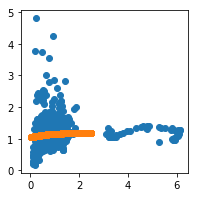

0.23198920725114033


C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

[1.1873868872570976]
1000 1000 [0.47718878491076777, 0.5453006240635636, 0.4007963645975605, 0.40420601566361225, 0.686151685958797, 0.5605628716925573, 0.3335775292953972, 0.4758086880506992, 0.45583787466382464, 0.6173092072918472, 0.5245991711625351, 0.48165380416393083, 0.4704506649469036, 0.4443911889420794, 0.7407872851838646, 0.6796571124996509, 0.6169032964506507, 0.4660668278619799, 0.6173092072918472, 0.5582897709818561, 0.9048564471955457, 0.7657913930015775, 0.602128141831093, 0.6083791687855212, 0.6734060855452226, 1.086055046705725, 0.6330585479302768, 0.6870446898094297, 0.8685680179925662, 0.7170820920579809, 0.8986054202411174, 0.8593944329815223, 1.193621419622834, 1.0911695233048027, 1.218381980935829, 1.2206550816465302, 1.0176184788799718, 0.8394236195946476, 1.3426718805102396, 1.1374433592012194, 1.1709715946840618, 1.3619120543829601, 1.4719138923472492, 1.111546247532874, 0.6540847295042627, 0.6334644587714735, 0.620231765348463, 0.5785041308734487, 0.628268800

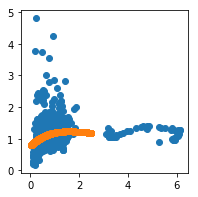

In [57]:

#variance_depth=
r_asumb=1
q=1
lrn_r_depth=8
#nmbr_pnts=
#rndmnss=
nmbr_data_points=50
lrning_depth=5
h_lim=0.01
intial_est=2
data_randomness=5
min_step=-2
lrn_r_depth=0
predicted_randomness=0.4079937249825579
euler_est=2
r_asum=0
qsum=1



car=pd.read_excel("C:/Users/dylan/Downloads/censusdata.xls", index_col=0)
car=car.drop(['Percent home ownership'], axis=1)
car=car.drop(['Percent under 18 years old'], axis=1)
car=car.drop(['Percent over 25 with bachelors degree'], axis=1)
car=car.dropna()
inputs=car["Percent over 65 years old"].values
y=car["Auto Fatalities per million miles "].values
print(y)
dfx_crp=pd.DataFrame()
dfy_crp=pd.DataFrame()
X=[]
y=[]
for i in range(0,56):
    df_crp[i*2]=df_crp[i*2].shift(periods=1)
for i in range(0,56):
    dfx_crp[i]=df_crp[i*2]
    dfy_crp[i]=df_crp[i*2+1]
for k in range(0,56):
    X.append(dfx_crp[k])
combinedx = pd.concat(X, ignore_index=True)

for k in range(0,56):
    y.append(dfy_crp[k])
combinedy = pd.concat(y, ignore_index=True)
#dfx_crp=dfx_crp.stack(dropna=False)
#dfy_crp=dfy_crp.stack(dropna=False)
df_concat = pd.concat([combinedy, combinedx], axis=1)
df_concat=df_concat.dropna(inplace=False)
inputs=df_concat[df_concat.columns[0]].head(1000)
y=df_concat[df_concat.columns[1]].head(1000)
y=y.values
inputs=inputs.values
yd=[]
for i in range(0,len(y)):
    yd.append(inputs[i]/y[i])
xd=[]
x_AV=(sum(inputs)/len(inputs))
for i in range(0,len(y)):
    xd.append(inputs[i]/x_AV)
inputs=xd
y=yd

print(inputs)
#inputs=np.random.randint(-1000, 1000, size=nmbr_data_points)/100
#y=inputs**2
b1=y
#plt.scatter(inputs, y)
#a=data_randomness
#r1=(1+a)*1000
#r2=(1-a)*1000
#r=np.random.randint(r2, r1, size=nmbr_data_points)/1000
#y=y*r
#b1=y
x_values=np.random.randint(0.03, 8, size=nmbr_data_points)/10
t_min=[]
e=10
t=[]
y_avg=sum(y)/len(y)
y_var=(sum(abs(y_avg-y)))/len(y)
yovar=y_var
for q in range(0,lrn_r_depth): 
    

    y_var=(yovar/(1+(predicted_randomness)))
    print("y_var:",y_var)

    def rosen(x):
        if x<1:
            x=1

        t=[]
        t_min=[]
        for i in inputs:
            y_xa=sum(y*(1/(x**(abs(i-inputs))))/sum(1/(x**(abs(i-inputs)))))
            t.append(y_xa)
        for i in x_values:
            y_xb=sum(y*(1/(x**(abs(i-inputs))))/sum(1/(x**(abs(i-inputs)))))
            t_min.append(y_xb)

        t_avg=sum(t)/len(t)
        t_var=(sum(abs(t_avg-t)))/len(t)
        return(abs(t_var-y_var))
        print(t_var-y_var)
#        return(abs(t_var-y_var),((((sum(abs(t_min-y)))/len(t_min))),t_var,t_var-y_var))
    #

    
    ####minimizer
    x0 = np.array([2.0])
    #    
    #res = minimize(rosen, x0, method='nelder-mead',
    #            options={"maxiter":500, "maxfev":500})
    res = minimize(rosen, x0, method='nelder-mead',
            options={"maxiter":500, "maxfev":500})
    intial_est=res.x
#    for i in range(0,lrning_depth):
#        der1=((rosen(intial_est+h_lim)))[0]
#        der2=(rosen(intial_est))[0]
#        intial_est=intial_est+(((((rosen(intial_est+h_lim)[0]-rosen(intial_est)[0])))/h_lim))*((((min_step))))
    if intial_est<-2:
        intial_est=(np.random.randint(-200, 200)/10000)
        print("no")
    print("intial_est:",intial_est)
    
    #    print(rosen(intial_est),intial_est)

    #    if intial_est<1:
    #        intial_est=1.1
    #        print("no")

    #    print(rosen(intial_est),y_var)
    #    print(intial_est)
    e=abs(intial_est)
    r_est=[]
    for i in inputs:
        y_e=sum(y*(1/(e**(abs(i-inputs))))/sum(1/(e**(abs(i-inputs)))))
    y_avgb=(sum(numpy.absolute(y)))/len(y)
    r_a=(sum(abs(y/y_e-1)))/len(y)
    r_est=(y_avgb/r_a)
    

    
    e=abs(intial_est)


    r_asumb=r_asumb+r_a
    #rosen1=var_rose
    
    
    r_asum=r_a+r_asum
    qsum=1+qsum*0.9
    r_a=(r_asum/qsum)*0.8+r_a*0.2
    predicted_randomness=r_a+1
    print("predicted randomnessw:",r_a)
    
randomness_estimate=r_asum/qsum
tg=[]
print(randomness_estimate,"actual")
x2_values=np.linspace(start = 0.03, stop = 2.5, num =1000)
for i in x2_values:
    y_x=sum(y*(1/(e**(abs(i-inputs))))/sum(1/(e**(abs(i-inputs)))))
    tg.append(y_x)


plt.scatter(inputs,y)
plt.scatter(x2_values,tg)
plt.show()
ar=rosen(e)
print(ar)
#print(r_est)
target_column =pd.DataFrame(y)
predictors = list(set(list(inputs))-set(target_column))
y=numpy.array(y).reshape(-1,1)
X =numpy.array(inputs).reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min =2
degree_max =8
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)
print(list(model.predict([[i]])))
z=[]
for i in x2_values:
    z.append(list(model.predict([[i]])))
print(len(inputs),len(b1),inputs,"A",b1,"hay")

#plt.plot(x2_values,(x2_values)**2)
plt.scatter(inputs,b1)
plt.scatter(x2_values,z)

from pylab import rcParams
rcParams['figure.figsize'] = 3, 3
plt.show()


In [8]:

e=abs(intial_est)
Xaxis_pred=[]
lasso_pred=[]
#y_testB=y_testB.tolist()
#inputs_test=inputs_test.tolist()
for i in range(0,len(y_testB)):
    lasso_pred.append(list(model.predict([[inputs_test[i]]])))
    a=sum(b1*(1/(e**(abs(inputs_test[i]-input2)))))
    b=sum(1/(e**(abs(inputs_test[i]-input2))))
    Xaxis_pred.append(a/b)
#print((((y*(1/(e**(abs(inputs_test[1]))))))))

#print(b)
print(a)

resultX=0
resultL=0
print(Xaxis_pred[1])
for i in range(0,len(y_testB)):
    resultX=resultX+abs(Xaxis_pred[i]/y_testB[i]-1)
    resultL=resultL+abs(lasso_pred[i]/y_testB[i]-1)

L_accuracy=resultL/len(y_testB)
X_accuracy=resultX/len(y_testB)
print("Lasso Accuracy=",L_accuracy)
print("X-axis Accuracy=",X_accuracy)


267.07046106571414
1.0937740825213738
Lasso Accuracy= [0.1591056]
X-axis Accuracy= 0.1534174668477557


In [97]:
print(len(y_testB))
print(mean_squared_error(Xaxis_pred, y_testB))

1000


ValueError: y_true and y_pred have different number of output (1000!=1)